*`- Step-by-step Project Overview`*

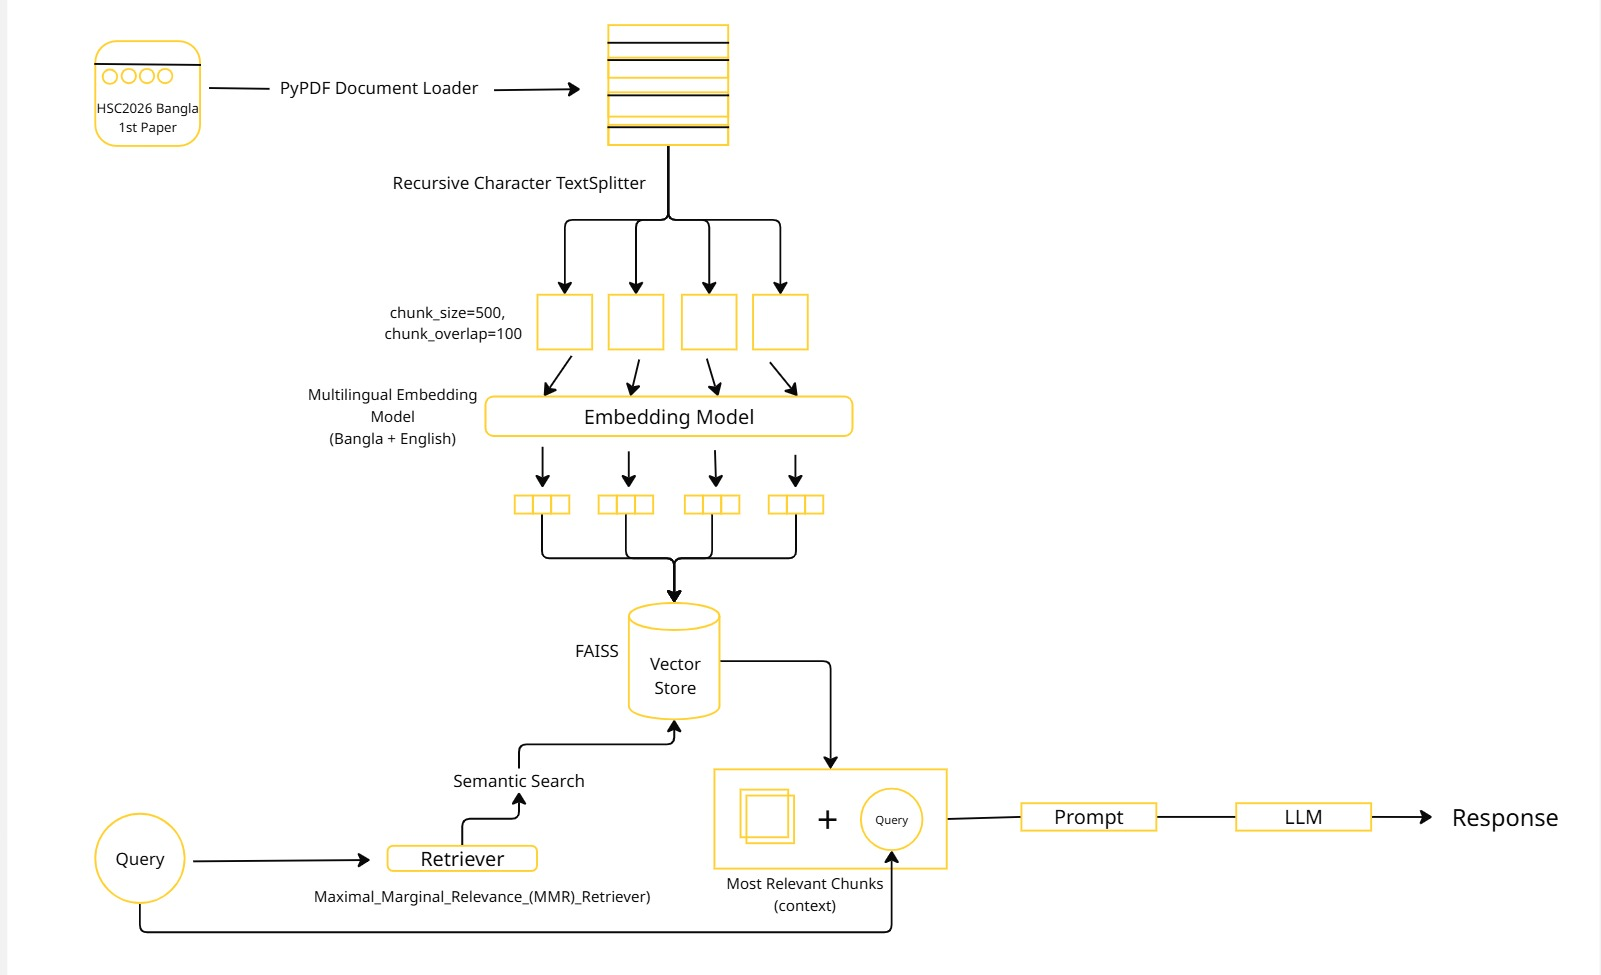

# Step 1: Install Dependencies

In [ ]:
!pip install langchain chromadb faiss-cpu sentence-transformers tiktoken pypdf langchain_openai langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.7/309.7 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 6.5 MB/s eta 0:0

In [ ]:
!pip install -q faiss-cpu tiktoken python-dotenv

In [ ]:
!pip install langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from dotenv import load_dotenv

from langchain_community.document_loaders import PyPDFLoader

#  Step 2: PDF Text Extraction & Cleaning

In [ ]:
# ✅ Step: Load Text from PDF and assign to `text_input`
from langchain.document_loaders import PyPDFLoader

# Load the PDF file
loader = PyPDFLoader("/content/HSC26-Bangla1st-Paper.pdf")  # path may change if uploaded again
documents = loader.load()

# Combine all pages into a single text string
text_data_bangla_1st = "\n".join([doc.page_content.strip() for doc in documents])

# ✅ Check the beginning of the text
print(text_data_bangla_1st[:1000])


অনলাইন ব্যাচ সম্পর্কিত যেককাকনা জিজ্ঞাাসা ,
অপরিরিতা
আল ািয রিষয়
িাাং া
১ম পত্র
১। অনুপলেি িািা কী কলি জীরিকা রনিবাহ কিলতন?
ক) ডাক্তার্ি খ) ওকালর্ত গ) মাস্টার্ি ঘ) ব্যব্সা
২। োোলক ভাগ্য দেিতাি প্রধান এলজন্ট ি াি কািণ, তাি-
ক) প্রর্তপজি খ) প্রভাব্  গ) র্ব্চক্ষণতা ঘ) কূট ব্ুর্ি
র্নকচি অনুকেদটি পক়ে ৩ ও ৪ সংখযক প্রকেি উিি দাও।
র্পতৃহীন দীপুি চাচাই র্িকলন পর্িব্াকিি কতিা। দীপু র্িজক্ষত হকলও তাি র্সিান্ত যনও াি ক্ষমতা র্িল না। চাচা 
তাি র্ব্ক ি উকদযাগ র্নকলও যেৌতুক র্নক  ব্া়োব্ার়্ে কিাি কািকণ কনযাি র্পতা অপমার্নত যব্াধ ককি র্ব্ক ি 
আকলাচনা যভকে যদন। দীপু যমক টিি ির্ব্ যদকখ মুগ্ধ হকলও তাি চাচাকক র্কিুই ব্লকত পাকিনর্ন।
৩। েীপুি িািাি সলে ‘অপরিরিতা' গ্লেি দকান িরিলেি রে  আলে?
ক) হর্িকিি খ) মামাি গ) র্িক্ষককি ঘ) র্ব্নুি
৪। উক্ত িরিলে প্রাধানয দপলয়লে -
i) যদৌিাত্ম ii) হীনম্মনযতা   iii) যলাভ
র্নকচি যকানটি ঠিক?
ক। i ও ii  খ। ii ও iii  গ। i ও iii  ঘ। i, ii ও iii
৫. অনুপলেি িয়স কত িেি?
ক) পঁর্চি  খ) িাব্বিি  গ) সাতাি  ঘ) আটাি
প্রাক-মূলযা ন
কতগুকলা প্রকেি সঠিক উিি র্দকত পািকল?
SL Ans SL Ans SL A

✅  Proper Pre-Processing & Data Cleaning

In [ ]:
import re

def clean_bangla_text(text):
    # Remove unwanted line breaks and extra whitespace
    text = re.sub(r'\n+', '\n', text)                 # Multiple newlines → single
    text = re.sub(r'[ \t]+', ' ', text)               # Multiple spaces/tabs → single space
    text = re.sub(r'^\s+|\s+$', '', text)             # Strip leading/trailing whitespace
    text = re.sub(r'\n\s*\n', '\n', text)             # Remove empty lines

    # Remove common non-text artifacts (page numbers, section markers)
    text = re.sub(r'পৃষ্ঠা\s*\d+','', text)            # "পৃষ্ঠা ৩৪" → remove
    text = re.sub(r'[\u200c\u200d]', '', text)         # Remove zero-width joiners if any
    text = re.sub(r'[^\u0980-\u09FFa-zA-Z0-9\s.,!?;:\'\"()\n]', '', text)  # Remove special symbols

    return text


In [ ]:
# After loading the PDF
text_data_bangla_1st = "\n".join([doc.page_content.strip() for doc in documents])

# Clean the text
cleaned_text = clean_bangla_text(text_data_bangla_1st)

# Preview cleaned version
print(cleaned_text[:1000])


অনলাইন ব্যাচ সম্পর্কিত যেককাকনা জিজ্ঞাাসা ,
অপরিরিতা
আল ািয রিষয়
িাাং া
১ম পত্র
১ অনুপলেি িািা কী কলি জীরিকা রনিবাহ কিলতন?
ক) ডাক্তার্ি খ) ওকালর্ত গ) মাস্টার্ি ঘ) ব্যব্সা
২ োোলক ভাগ্য দেিতাি প্রধান এলজন্ট ি াি কািণ, তাি
ক) প্রর্তপজি খ) প্রভাব্ গ) র্ব্চক্ষণতা ঘ) কূট ব্ুর্ি
র্নকচি অনুকেদটি পক়ে ৩ ও ৪ সংখযক প্রকেি উিি দাও
র্পতৃহীন দীপুি চাচাই র্িকলন পর্িব্াকিি কতিা দীপু র্িজক্ষত হকলও তাি র্সিান্ত যনও াি ক্ষমতা র্িল না চাচা 
তাি র্ব্ক ি উকদযাগ র্নকলও যেৌতুক র্নক ব্া়োব্ার়্ে কিাি কািকণ কনযাি র্পতা অপমার্নত যব্াধ ককি র্ব্ক ি 
আকলাচনা যভকে যদন দীপু যমক টিি ির্ব্ যদকখ মুগ্ধ হকলও তাি চাচাকক র্কিুই ব্লকত পাকিনর্ন
৩ েীপুি িািাি সলে অপরিরিতা' গ্লেি দকান িরিলেি রে আলে?
ক) হর্িকিি খ) মামাি গ) র্িক্ষককি ঘ) র্ব্নুি
৪ উক্ত িরিলে প্রাধানয দপলয়লে 
i) যদৌিাত্ম ii) হীনম্মনযতা iii) যলাভ
র্নকচি যকানটি ঠিক?
ক i ও ii খ ii ও iii গ i ও iii ঘ i, ii ও iii
৫. অনুপলেি িয়স কত িেি?
ক) পঁর্চি খ) িাব্বিি গ) সাতাি ঘ) আটাি
প্রাকমূলযা ন
কতগুকলা প্রকেি সঠিক উিি র্দকত পািকল?
SL Ans SL Ans SL Ans SL Ans SL Ans
১ খ ২ গ ৩ খ

#Step 3: Text Splitting into Chunks

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=100,
)
chunks = text_splitter.create_documents([cleaned_text])

In [ ]:
len(chunks)

181

In [ ]:
chunks[50]

Document(metadata={}, page_content='না অথচ যসই নাযচনাটুকু যে কু ািামাত্র, যস যে মা া, যসটা র্িন্ন হইকলই যে যচনাি আি অন্ত নাই ওকগা\nসুধাম সুি, যে হৃদক ি অপরূপ রূপ তুর্ম, যস র্ক আমাি র্চিকাকলি যচনা ন  িা গা আকি আকিিীঘ্র\nআর্সকতডার্ক াি, িীঘ্রইআর্স ার্ি, একর্নকমষওযদর্িকর্িনাই\nপির্দন সকাকল একটা ব্ক়ো যস্টিকন গার়্ে ব্দল কর্িকত হইকব্ আমাকদি ফাস্টি ক্লাকসি টির্কটমকন আিা\nর্িল, র্ভ়েহইকব্নানার্ম াযদর্খ, প্ল্যাটফকমিসাকহব্কদিআদিাজলদলআসব্াব্পত্রলই াগার়্েিিনযঅকপক্ষা')

# Step 4: Embedding Multilingual (Bangla + English) + Vector Store (FAISS)

In [ ]:
# HF_Embeddding Used
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
# Step : Create the FAISS vector store from documents
vector_store = FAISS.from_documents(
    documents = chunks,
    embedding = embedding_model
)

In [ ]:
vector_store.index_to_docstore_id

{0: '30980458-a578-4b9e-bf12-9573237b71da',
 1: 'f866d9af-60a2-416f-b51d-6b48c68153f8',
 2: '3bdcf7f9-4dda-431c-b0ba-b8878690d20e',
 3: '543f9c24-fb79-4a38-9ec5-90ca12c570ec',
 4: 'adaa52c3-995d-4ab2-980e-e053ef3d48b3',
 5: 'acd6f005-0ebb-44bd-954e-e3b675758f8e',
 6: '50cead01-4961-478d-822a-ae88254f16c4',
 7: '3da76501-2c8f-454a-8fad-b9f9344defd2',
 8: '6b9e0fad-974a-439b-8e29-3d84168264b5',
 9: 'e703ae47-967f-44b1-9fa6-dbf17e8f6a04',
 10: '0966ceef-e058-4ec4-a154-e159aa642809',
 11: '051b7c34-12d7-4506-926b-fb074848526b',
 12: '624ae6d4-335f-49cd-a9d0-cce6393103b5',
 13: 'fb52e6dd-c9fc-4803-887f-c3b0dcd4eb6f',
 14: 'e90fedeb-9dee-400e-b9cf-9404d60974db',
 15: 'a161d20d-4944-46dd-ba10-51b9354da766',
 16: 'a86d1a66-285c-40ca-9b30-76483dfa0d43',
 17: 'dee64f34-9283-47ad-912f-c6c6f0614fd0',
 18: 'b81a71d0-bc99-4e22-997e-30d4289d5ce0',
 19: 'ab480f00-2017-4b02-a345-4d78bad76b8d',
 20: '5a864be1-81a6-4e9b-a0ea-efd534e5941e',
 21: 'abc633a8-8cef-42d1-90ed-0940d4a7af7f',
 22: '3660433b-371b-

In [ ]:
vector_store.get_by_ids(['98b6f8be-68c8-4ce4-b6f3-e5f51ff40d09'])

[]

# Step 5: Retriever + Augmented QA Chain (RAG)

In [ ]:
retriever = vector_store.as_retriever(search_type="mmr",search_kwargs = {"k":3, "lambda_mult": 0.2})
    # <-- lambda_mult = (0-1) relevance-diversity balance)

In [ ]:
retriever

VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x798520ada690>, search_kwargs={'k': 4})

 - Augmentation

In [ ]:
question          = "বিয়ের সময় কল্যাণীর প্রকৃত বয়স কত ছিল?"
retrieved_docs    = retriever.invoke(question)

In [ ]:
retrieved_docs

[Document(id='2b082970-4067-4bc3-869b-6a45024d1c79', metadata={}, page_content="২৩ কলযাণীির্পতািনামর্ক? িা.রি. A ২০১৬১৭ \n(ক) হর্িিচন্দ্র যসন (খ) িগন্নাথ যসন (গ) অনুপম যসন (ঘ) িম্ভুনাথ যসন উিি: ঘ\n31\n২৪ অপর্ির্চতাগকেঅনুপকমিব্ন্ধুযক? ঢা.রি. C ২০১৬১৭\n(ক) র্ব্নুদা (খ) কলযাণী (গ) হর্িি (ঘ) িম্ভুনাথ উিি: গ\n২৫ মাকালফল' ব্াগধািাটির্দক যব্াঝা  ঢা.রি. অরধভুক্ত৭ কল জ (োনরিক)\n(ক) উশ্চেষ্ট্ ব্ন্ধু (খ) র্নর্দিষ্ট্ ঋতুর্ভজিক ফল \n(গ) র্ব্কিষ অকথি গুণহীন (ঘ) কদাকাি ব্স্তু উিি: গ\n২৬ 'অপর্ির্চতা' গেটিপ্রথমপ্রকািপা যকানপর্ত্রকা ? িা.রি. A ইউরনট ২০১৭১৮"),
 Document(id='d5ad7db2-da6e-489b-b5aa-0fa0935d058a', metadata={}, page_content="(ক) কর্ব্তা পর্ত্রকা (খ) সব্ুিপত্র পর্ত্রকা (গ) ককল্লাল পর্ত্রকা (ঘ) ভািতী পর্ত্রকা উিি: খ\n২৭ ঠাট্টািসম্পকিটাককিা ীকর্িব্ািইোআমািনাই' উজক্তটিকাি? িা.রি. A ইউরনট ২০১৭১৮\n(ক) মামাি (খ) িম্ভুনাকথি (গ) অনুপকমি (ঘ) কলযাণীি উিি: খ\n32\nপ্রযাকটিস\nিহুরনিবািনী \n১ িব্ীন্দ্রনাথঠাকুকিিিীব্নাব্সানঘকটযকাথা ? \n(ক) যিা়োসঁাককাি ঠাকুি ব্ার়্েকত (খ) যব্ালপুকিি িাজন্তর্নককতকন \n(গ)

In [ ]:
# join 4 result
context_text = "\n\n".join(doc.page_content for doc in retrieved_docs) # join 4 result
context_text

"২৩ কলযাণীির্পতািনামর্ক? িা.রি. A ২০১৬১৭ \n(ক) হর্িিচন্দ্র যসন (খ) িগন্নাথ যসন (গ) অনুপম যসন (ঘ) িম্ভুনাথ যসন উিি: ঘ\n31\n২৪ অপর্ির্চতাগকেঅনুপকমিব্ন্ধুযক? ঢা.রি. C ২০১৬১৭\n(ক) র্ব্নুদা (খ) কলযাণী (গ) হর্িি (ঘ) িম্ভুনাথ উিি: গ\n২৫ মাকালফল' ব্াগধািাটির্দক যব্াঝা  ঢা.রি. অরধভুক্ত৭ কল জ (োনরিক)\n(ক) উশ্চেষ্ট্ ব্ন্ধু (খ) র্নর্দিষ্ট্ ঋতুর্ভজিক ফল \n(গ) র্ব্কিষ অকথি গুণহীন (ঘ) কদাকাি ব্স্তু উিি: গ\n২৬ 'অপর্ির্চতা' গেটিপ্রথমপ্রকািপা যকানপর্ত্রকা ? িা.রি. A ইউরনট ২০১৭১৮\n\n(ক) কর্ব্তা পর্ত্রকা (খ) সব্ুিপত্র পর্ত্রকা (গ) ককল্লাল পর্ত্রকা (ঘ) ভািতী পর্ত্রকা উিি: খ\n২৭ ঠাট্টািসম্পকিটাককিা ীকর্িব্ািইোআমািনাই' উজক্তটিকাি? িা.রি. A ইউরনট ২০১৭১৮\n(ক) মামাি (খ) িম্ভুনাকথি (গ) অনুপকমি (ঘ) কলযাণীি উিি: খ\n32\nপ্রযাকটিস\nিহুরনিবািনী \n১ িব্ীন্দ্রনাথঠাকুকিিিীব্নাব্সানঘকটযকাথা ? \n(ক) যিা়োসঁাককাি ঠাকুি ব্ার়্েকত (খ) যব্ালপুকিি িাজন্তর্নককতকন \n(গ) কুষ্টি াি র্িলাইদকহ (ঘ) কজলকাতাি হাসপাতাকল \n২ গাকনি যে অংি যদাহািিা ব্ািব্াি পর্িকব্িকন ককি তাকক কী ব্কল?\n\nো যে, প্রকোক্তমন্তব্যটিেুজক্তেুক্ত\n46\nপ্রশ্ন

In [ ]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate(
    template="""

🌐 You are an intelligent multilingual assistant capable of understanding both বাংলা and English.

🧠 Your task is to answer the user's question strictly based on the provided context below.

⚠️ Guidelines:

- Use only the given context to answer.

- If the answer is not found in the context, reply with "জানি না" or "I don't know" depending on the question language.

- Keep your answer very short and direct (1 sentence maximum).

- Do not generate or assume any information outside the context.

- If the question is in English, respond in English. If the question is in Bengali, respond in Bengali.

📚 Context:
{context}

❓ Question:
{question}


    """,
    input_variables=["context", "question"]
)


In [ ]:
#Augmentation
final_prompt = prompt.invoke({"context": context_text, "question": question})


In [ ]:
final_prompt

StringPromptValue(text='\n    \n🌐 You are an intelligent multilingual assistant capable of understanding both বাংলা and English.\n\n🧠 Your task is to answer the user\'s question strictly based on the provided context below.\n\n⚠️ Guidelines:\n\n- Use only the given context to answer.\n\n- If the answer is not found in the context, reply with "জানি না" or "I don\'t know" depending on the question language.\n\n- Keep your answer very short and direct (1 sentence maximum).\n\n- Do not generate or assume any information outside the context.\n\n- If the question is in English, respond in English. If the question is in Bengali, respond in Bengali.\n\n📚 Context:\n২৩ কলযাণীির্পতািনামর্ক? িা.রি. A ২০১৬১৭ \n(ক) হর্িিচন্দ্র যসন (খ) িগন্নাথ যসন (গ) অনুপম যসন (ঘ) িম্ভুনাথ যসন উিি: ঘ\n31\n২৪ অপর্ির্চতাগকেঅনুপকমিব্ন্ধুযক? ঢা.রি. C ২০১৬১৭\n(ক) র্ব্নুদা (খ) কলযাণী (গ) হর্িি (ঘ) িম্ভুনাথ উিি: গ\n২৫ মাকালফল\' ব্াগধািাটির্দক যব্াঝা  ঢা.রি. অরধভুক্ত৭ কল জ (োনরিক)\n(ক) উশ্চেষ্ট্ ব্ন্ধু (খ) র্নর্দিষ্ট্ ঋতুর

# Step 6: Answer Generation

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
import os

os.environ["GOOGLE_API_KEY"] = "your API key here"

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-pro",
    temperature=0.1
)

# Generate a response
answer = llm.invoke(final_prompt)
print(answer.content)


জানি না।


# Building a Chain

In [ ]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser

In [ ]:
def format_docs(retrieved_docs):
  context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)
  return context_text

In [ ]:
context_text

"২৩ কলযাণীির্পতািনামর্ক? িা.রি. A ২০১৬১৭ \n(ক) হর্িিচন্দ্র যসন (খ) িগন্নাথ যসন (গ) অনুপম যসন (ঘ) িম্ভুনাথ যসন উিি: ঘ\n31\n২৪ অপর্ির্চতাগকেঅনুপকমিব্ন্ধুযক? ঢা.রি. C ২০১৬১৭\n(ক) র্ব্নুদা (খ) কলযাণী (গ) হর্িি (ঘ) িম্ভুনাথ উিি: গ\n২৫ মাকালফল' ব্াগধািাটির্দক যব্াঝা  ঢা.রি. অরধভুক্ত৭ কল জ (োনরিক)\n(ক) উশ্চেষ্ট্ ব্ন্ধু (খ) র্নর্দিষ্ট্ ঋতুর্ভজিক ফল \n(গ) র্ব্কিষ অকথি গুণহীন (ঘ) কদাকাি ব্স্তু উিি: গ\n২৬ 'অপর্ির্চতা' গেটিপ্রথমপ্রকািপা যকানপর্ত্রকা ? িা.রি. A ইউরনট ২০১৭১৮\n\n(ক) কর্ব্তা পর্ত্রকা (খ) সব্ুিপত্র পর্ত্রকা (গ) ককল্লাল পর্ত্রকা (ঘ) ভািতী পর্ত্রকা উিি: খ\n২৭ ঠাট্টািসম্পকিটাককিা ীকর্িব্ািইোআমািনাই' উজক্তটিকাি? িা.রি. A ইউরনট ২০১৭১৮\n(ক) মামাি (খ) িম্ভুনাকথি (গ) অনুপকমি (ঘ) কলযাণীি উিি: খ\n32\nপ্রযাকটিস\nিহুরনিবািনী \n১ িব্ীন্দ্রনাথঠাকুকিিিীব্নাব্সানঘকটযকাথা ? \n(ক) যিা়োসঁাককাি ঠাকুি ব্ার়্েকত (খ) যব্ালপুকিি িাজন্তর্নককতকন \n(গ) কুষ্টি াি র্িলাইদকহ (ঘ) কজলকাতাি হাসপাতাকল \n২ গাকনি যে অংি যদাহািিা ব্ািব্াি পর্িকব্িকন ককি তাকক কী ব্কল?\n\nো যে, প্রকোক্তমন্তব্যটিেুজক্তেুক্ত\n46\nপ্রশ্ন

In [ ]:
parallel_chain = RunnableParallel({
    'context': retriever | RunnableLambda(format_docs),
    'question': RunnablePassthrough()
})

In [ ]:
parser = StrOutputParser()

In [ ]:
main_chain = parallel_chain | prompt | llm | parser

In [ ]:
main_chain.invoke('বিয়ের সময় কল্যাণীর প্রকৃত বয়স কত ছিল?')

'জানি না।'

In [ ]:
# Get answers from the RAG chain
response1 = main_chain.invoke("অনুপমের ভাষায় সুপুরুষ কাকে বলা হয়েছে?")
response2 = main_chain.invoke("কাকে অনুপমের ভাগ্য দেবতা বলে উল্লেখ করা হয়েছে?")
response3 = main_chain.invoke("বিয়ের সময় কল্যাণীর প্রকৃত বয়স কত ছিল?")
response4 = main_chain.invoke("Who is mentioned as Anupam’s fate god?")

# Print results
print("✅", response1, "\n")

print("✅", response2, "\n")

print("✅", response3, "\n")

print("✅", response4, "\n")


✅ জানি না। 

✅ জানি না। 

✅ জানি না। 

✅ I don't know. 

